In [15]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/sensory_result.csv')

In [3]:
categories = list(data.columns)[1:-1]
aroma_classes = ['fermented', 'cheesy', 'milky', 'fruity']

In [ ]:
# PCA

In [7]:
X = data.iloc[:,1:-1].values

In [12]:
pca_transform = PCA(n_components=2)
X_pca = pca_transform.fit_transform(X)
print(pca_transform.explained_variance_ratio_)

[0.43768384 0.20877261]


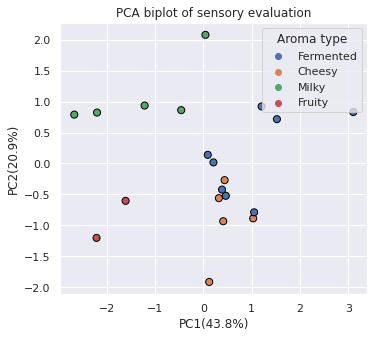

In [27]:
X_pca_pd = pd.DataFrame(X_pca, columns=['PC1(43.8%)','PC2(20.9%)'])
X_pca_pd['Aroma type'] = [ x[0].upper()+x[1:] for x in list(data['Aroma type'])]

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(5.5,5))
sns.scatterplot(x='PC1(43.8%)', y='PC2(20.9%)',hue="Aroma type",
        hue_order=['Fermented', 'Cheesy', 'Milky', 'Fruity'],linewidth=1,data=X_pca_pd, s=50, edgecolor='black', ax=ax)
ax.set_title('PCA biplot of sensory evaluation');
plt.savefig('../Figures/sensory_pca.svg',format='svg',dpi=150)

# Radar map

In [8]:
fig = go.Figure()
temp_data = data[data['Aroma type']=='fermented'].reset_index()
L= temp_data[categories].values
ub = max(max(x) for x in L)

for i in range(len(temp_data.index)):
    fig.add_trace(go.Scatterpolar( r= list( temp_data[categories].iloc[i].values ),
      theta=categories,
      fill='none',
      name=list(temp_data['sample'])[i]   ))
fig.update_layout( title_text= 'Fermented(n='+str(len(temp_data.index))+')',title_x = 0.5,
                  polar=dict( radialaxis=dict(visible=True,range=[0, int(ub)+1])),showlegend=True )
pio.write_image(fig, '../Figures/Fermented_radar.svg')

In [9]:
fig = go.Figure()
temp_data = data[data['Aroma type']=='cheesy'].reset_index()
L= temp_data[categories].values
ub = max(max(x) for x in L)

for i in range(len(temp_data.index)):
    fig.add_trace(go.Scatterpolar( r= list( temp_data[categories].iloc[i].values ),
      theta=categories,
      fill='none',
      name=list(temp_data['sample'])[i]   ))
fig.update_layout( title_text= 'Cheesy(n='+str(len(temp_data.index))+')',title_x = 0.5,
                  polar=dict( radialaxis=dict(visible=True,range=[0, int(ub)+1])),showlegend=True )
pio.write_image(fig, '../Figures/Cheesy_radar.svg')

In [10]:
fig = go.Figure()
temp_data = data[data['Aroma type']=='milky'].reset_index()
L= temp_data[categories].values
ub = max(max(x) for x in L)

for i in range(len(temp_data.index)):
    fig.add_trace(go.Scatterpolar( r= list( temp_data[categories].iloc[i].values ),
      theta=categories,
      fill='none',
      name=list(temp_data['sample'])[i]   ))
fig.update_layout( title_text= 'Milky(n='+str(len(temp_data.index))+')',title_x = 0.5,
                  polar=dict( radialaxis=dict(visible=True,range=[0, int(ub)+1])),showlegend=True )
pio.write_image(fig, '../Figures/Milky_radar.svg')  

In [11]:
fig = go.Figure()
temp_data = data[data['Aroma type']=='fruity'].reset_index()
L= temp_data[categories].values
ub = max(max(x) for x in L)

for i in range(len(temp_data.index)):
    fig.add_trace(go.Scatterpolar( r= list( temp_data[categories].iloc[i].values ),
      theta=categories,
      fill='none',
      name=list(temp_data['sample'])[i]   ))
fig.update_layout( title_text= 'Fruity(n='+str(len(temp_data.index))+')',title_x = 0.5,
                  polar=dict( radialaxis=dict(visible=True,range=[0, int(ub)+1])),showlegend=True )
pio.write_image(fig, '../Figures/Fruity_radar.svg')